In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [3]:
data = pd.read_csv("xyzt_tent.csv", names=["x", "y", "z", "time"])
data.head(5)

,x,y,z,time
0,-0.775469,0.010934,0.762418,19
1,-0.771547,0.009055,0.762991,20
2,-0.769092,0.008304,0.765042,21
3,-0.766927,0.006463,0.766104,22
4,-0.764569,0.005003,0.767672,23


In [53]:
# find last timepoint

t = data['time'][len(data.index)-1]
t

106755

In [44]:
#find number of flashing events per timestep

activity_counts = data["time"].value_counts().sort_index()
activity_counts

19        1
20        1
21        1
22        1
23        1
         ..
106751    1
106752    1
106753    1
106754    1
106755    1
Name: time, Length: 13243, dtype: int64

In [57]:
# pad for timesteps with no activity

padded_activity_counts = [0 for _ in range(t+1)]

for c in activity_counts.keys():
    padded_activity_counts[c] = activity_counts[c]
    
padded_activity_counts = pd.Series(padded_activity_counts)

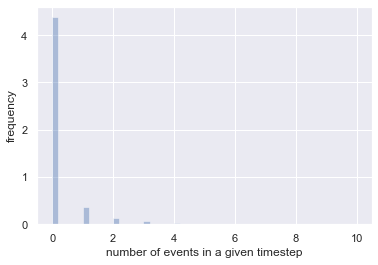

In [70]:
# histogram

ax = sns.distplot(padded_activity_counts, kde=False, norm_hist=True)
ax.set(xlabel="number of events in a given timestep", ylabel="frequency")

plt.show()

In [8]:
data[data['time'] == 6732]  

,x,y,z,time
2049,0.046333,0.563902,0.833833,6732
2050,-0.117963,0.585024,0.999667,6732
2051,-0.549296,-0.500409,1.085331,6732
2052,-0.699862,-0.383130,1.035559,6732
2053,-0.649307,0.424054,0.937445,6732
2054,-0.814351,0.776012,1.076040,6732
2055,-0.891222,-0.529673,1.085499,6732
2056,-1.068200,0.784142,1.023505,6732
2057,-0.633498,0.793891,0.570317,6732
2058,-0.331367,0.778787,0.090869,6732


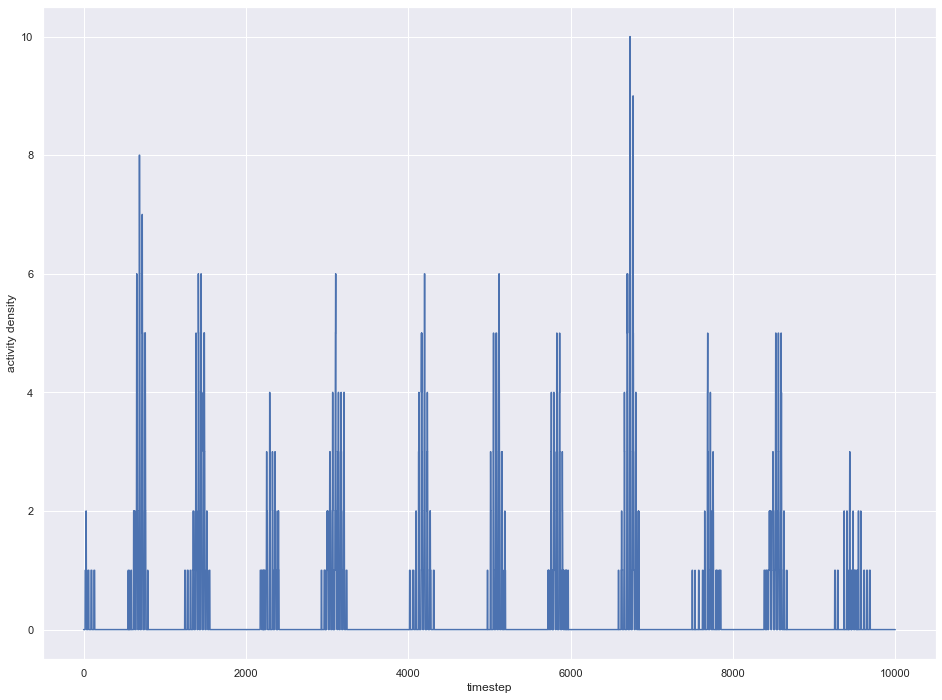

In [88]:
# find how active fireflies are over time

fig, ax = plt.subplots(figsize=(16, 12))

ax = sns.lineplot(padded_activity_counts.index[:10000], padded_activity_counts[:10000])
ax.set(xlabel="timestep", ylabel="activity density")
plt.show()

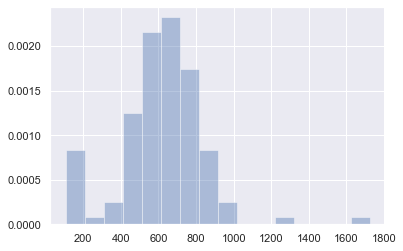

In [86]:
# what does the distribution of gaps between the bursts of activity look like?

gaps = []
s = 0
active = True

for val in padded_activity_counts:
    if val == 0:
        s += 1
        active = False
    else:
        if not active:
            if s > 100:  # arbitrary cutoff to find large gaps
                gaps.append(s)
            s = 0
            active = True
            
sns.distplot(gaps, bins=16, norm_hist=True, kde=False)

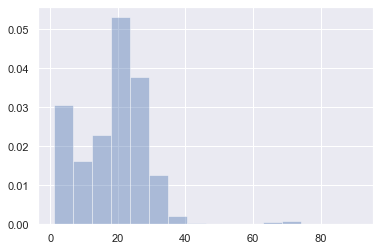

In [92]:
gaps = []
s = 0
active = True

for val in padded_activity_counts:
    if val == 0:
        s += 1
        active = False
    else:
        if not active:
            if s <= 100:  # arbitrary cutoff to find small gaps
                gaps.append(s)
            s = 0
            active = True
            
sns.distplot(gaps, bins=16, norm_hist=True, kde=False)